# Sentiment Analysis on Twitter Data

### Importing dependencies


In [29]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

print("Hello")

Hello


Get all the Stopwords

In [30]:
import nltk
nltk.download('stopwords')

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akashmahapatra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Data Processing

In [31]:
# Reading the data to analyse
column_names = ['target', 'id', 'date', 'flag', 'user', 'text']

twitter_data = pd.read_csv('../data/training.1600000.processed.noemoticon.csv', names = column_names, encoding='ISO-8859-1')
twitter_data.shape

twitter_data.head()



,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [32]:
# Counting the missing values from all the columns combined
twitter_data.isnull().sum()


target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [33]:
# Distribution of positive and negative tweets in the dataset
twitter_data['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

In [34]:
# Check the text where the target is either 0 or 4

negative_twitter_data = twitter_data[twitter_data['target'] == 0]
positive_twitter_data = twitter_data[twitter_data['target'] == 4]

print('===================== Sample Postive data =====================')
print(positive_twitter_data.iloc[0])
print(positive_twitter_data['text'].iloc[0])

print('===================== Sample negative data =====================')
print(negative_twitter_data.iloc[0])
print(negative_twitter_data['text'].iloc[0])

===================== Sample Postive data =====================
target                                               4
id                                          1467822272
date                      Mon Apr 06 22:22:45 PDT 2009
flag                                          NO_QUERY
user                                             ersle
text      I LOVE @Health4UandPets u guys r the best!! 
Name: 800000, dtype: object
I LOVE @Health4UandPets u guys r the best!! 
===================== Sample negative data =====================
target                                                    0
id                                               1467810369
date                           Mon Apr 06 22:19:45 PDT 2009
flag                                               NO_QUERY
user                                        _TheSpecialOne_
text      @switchfoot http://twitpic.com/2y1zl - Awww, t...
Name: 0, dtype: object
@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David 

In [35]:
# Replace target value 4 to 1
twitter_data.replace({'target' : {4:1}},inplace=True)

In [36]:
# Distribution of positive and negative tweets in the dataset
twitter_data['target'].value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

| Target Value | Sentiment |
|---|---|
| 0 | Negative |
| 1 | Positive |


**Data Stemming**

In [37]:
port_stem = PorterStemmer()

def stem_function(text):
    stemmed_content =  re.sub('[^a-zA-Z]', ' ', text).lower().split()

    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]

    stemmed_content = ' '.join(stemmed_content)

    return stemmed_content

In [38]:
twitter_data['stemmed_content'] = twitter_data['text'].apply(stem_function)

In [39]:
twitter_data.head()

,target,id,date,flag,user,text,stemmed_content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


In [40]:
twitter_data.shape

(1600000, 7)

In [41]:
X = twitter_data['stemmed_content'].values
Y = twitter_data['target'].values

print(X)

print(Y)

['switchfoot http twitpic com zl awww bummer shoulda got david carr third day'
 'upset updat facebook text might cri result school today also blah'
 'kenichan dive mani time ball manag save rest go bound' ...
 'readi mojo makeov ask detail'
 'happi th birthday boo alll time tupac amaru shakur'
 'happi charitytuesday thenspcc sparkschar speakinguph h']
[0 0 0 ... 1 1 1]


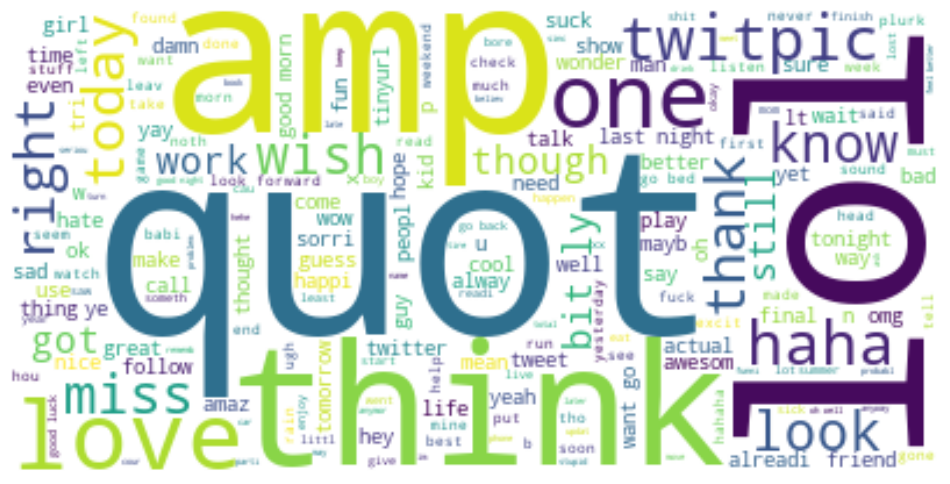

In [42]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white")

text_data = " ".join(X)

wordcloud.generate(text_data)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Splitting the Data

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)

print(X.shape, X_train.shape, X_test.shape)

(1600000,) (1280000,) (320000,)


### Vectorizing the data set

In [44]:
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [58]:
# Exporting the vectorizer to use it for later predictions 

import pickle

with open('../model/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [45]:
print(X_train)

  (0, 67142)	0.6946067092052259
  (0, 164855)	0.2947958498792734
  (0, 151972)	0.3330247561868587
  (0, 398278)	0.3181799949288029
  (0, 79056)	0.4674108781520108
  (1, 151835)	0.18874917413736372
  (1, 416845)	0.34407624225723343
  (1, 87248)	0.2979981504902405
  (1, 453884)	0.38811464603846063
  (1, 366673)	0.32869020131065935
  (1, 384735)	0.5931392834760078
  (1, 80651)	0.34240077452375683
  (1, 150853)	0.17163817808663323
  (2, 151835)	0.25523996839150503
  (2, 289335)	0.3114158586147003
  (2, 10531)	0.6136063927393425
  (2, 168588)	0.2801744981543822
  (2, 418473)	0.3815803187162624
  (2, 448101)	0.487092011103159
  (3, 246395)	0.4662377800619154
  (3, 438503)	0.2962031985466403
  (3, 288511)	0.34930679506939033
  (3, 256288)	0.4011355707118524
  (3, 357966)	0.2851295324693178
  (3, 153324)	0.3126376648158157
  :	:
  (1279997, 120469)	0.23913963479108852
  (1279997, 134016)	0.3011829568603336
  (1279997, 162997)	0.28073836136045355
  (1279997, 169426)	0.362235049342362
  (1279997

In [46]:
print(X_test)

  (0, 56501)	0.6069132761274134
  (0, 150763)	0.3122170532349987
  (0, 378338)	0.4127368156883631
  (0, 412151)	0.28999981963336324
  (0, 426633)	0.5288905487126719
  (1, 20610)	0.2389191766551788
  (1, 67794)	0.2691045798568652
  (1, 136617)	0.3225627385786409
  (1, 149867)	0.13114645743476205
  (1, 158453)	0.36060687238977884
  (1, 181629)	0.5031427692144689
  (1, 235850)	0.2521859067057023
  (1, 302178)	0.3143730285294127
  (1, 330635)	0.28027700881404866
  (1, 415869)	0.18899824653673736
  (1, 438503)	0.17347702970587398
  (1, 451362)	0.2434467592203107
  (2, 61115)	0.720836176906439
  (2, 249928)	0.3245140878216729
  (2, 267469)	0.24568086801986372
  (2, 298882)	0.26593393002925353
  (2, 357966)	0.2522396576351952
  (2, 375885)	0.3111512790671493
  (2, 376498)	0.2890776806800127
  (3, 39945)	0.2125264619567404
  :	:
  (319996, 167354)	0.28830945686894704
  (319996, 175433)	0.2962044825350365
  (319996, 358636)	0.5712273643117223
  (319996, 438200)	0.4677612658878187
  (319997, 850

### Training the Logistic Regression Model

In [47]:
model = LogisticRegression(max_iter=1000)

In [48]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

### Accuracy Score on Training data

In [49]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [50]:
# Accuracy Score on the training data
print(training_data_accuracy)

0.80201015625


### Accuracy on Test Data

In [51]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [52]:
print(test_data_accuracy)

0.7780375


Model accuracy = 77.6 %

### Saving the trained model

In [53]:
import pickle

In [54]:
filename = '../model/trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

### Testing the model

In [55]:
loaded_model = pickle.load(open('../model/trained_model.sav', 'rb'))

In [56]:
X_new = X_test[200]
print(X_new)
print(Y_test[200])

prediction = loaded_model.predict(X_new)
print(prediction)

if (prediction[0] == 0):
    print('Negative Tweet')

else:
    print('Positive Tweet')

  (0, 49082)	0.32891210753948574
  (0, 75596)	0.3086671316734722
  (0, 157104)	0.5198013489919177
  (0, 279302)	0.43672067176044405
  (0, 288103)	0.22200944633954137
  (0, 344690)	0.3088299213176973
  (0, 453064)	0.436988472635846
1
[1]
Positive Tweet


### Exporting the model to PMML Model for Streambase

In [57]:
from joblib import dump

dump(model, '../model/my_model.pmml')

['../model/my_model.pmml']